In [ ]:
pip install netCDF4 xarray numpy matplotlib


In [ ]:
# from google.colab import files

# # This will open a file picker to upload files from your local machine
# uploaded = files.upload()

# # Uploaded files will be stored in /content


In [ ]:
# # . Using Zip Folders
# from google.colab import files
# import zipfile
# import os

# # Upload the zip file
# uploaded = files.upload()

# # Assuming the file is uploaded successfully, unzip it
# zip_file = 'your_folder.zip'  # Replace with the name of your zip file
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     zip_ref.extractall('/content/your_folder')

# # Check the contents of the unzipped folder
# os.listdir('/content/your_folder')


In [ ]:
# Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

# Now you can access your Drive's content
# List the files in the directory
!ls "/content/drive/My Drive/ESGF_LAI"

# For example, to access a file in the folder:
file_path = '/content/drive/MyDrive/ESGF_LAI/lai_Lmon_CanESM5_ssp245_r1i1p1f1_gn_201501-210012.nc'

# You can now use the file path to load the file in your code


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
lai_Lmon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc
lai_Lmon_CanESM5_ssp126_r1i1p1f1_gn_201501-210012.nc
lai_Lmon_CanESM5_ssp245_r1i1p1f1_gn_201501-210012.nc
lai_Lmon_CanESM5_ssp370_r1i1p1f1_gn_201501-210012.nc
lai_Lmon_CanESM5_ssp460_r1i1p1f1_gn_201501-210012.nc
lai_Lmon_CanESM5_ssp585_r1i1p1f1_gn_201501-210012.nc
LAI_V1_for_HighResMIP.nc


In [ ]:
file_path

'/content/drive/MyDrive/ESGF_LAI/lai_Lmon_CanESM5_ssp245_r1i1p1f1_gn_201501-210012.nc'

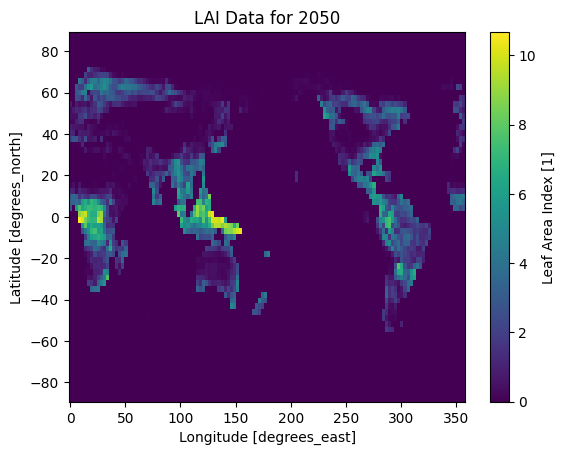

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the NetCDF file and process data for a given year
def process_nc_file(file_path, year):
    # Load the dataset
    data = xr.open_dataset(file_path)

    # Select data for the given year
    data_year = data.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))

    # Plot the LAI data for the first time step of the selected year
    data_year['lai'].isel(time=0).plot()
    plt.title(f'LAI Data for {year}')
    plt.show()
# Example usage:
file_path = file_path  # Replace with actual file path
year = 2050  # Year you want to extract
process_nc_file(file_path, year)

Dataset loaded successfully from /content/drive/MyDrive/ESGF_LAI/lai_Lmon_CanESM5_ssp245_r1i1p1f1_gn_201501-210012.nc
<xarray.Dataset> Size: 34MB
Dimensions:    (time: 1032, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 17kB ...
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    lai        (time, lat, lon) float32 34MB ...
Attributes: (12/53)
    CCCma_model_hash:            1f91f92cb6d607391f44831504025d32fc44faa1
    CCCma_parent_runid:          rc3.1-his01
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-s4501
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_t

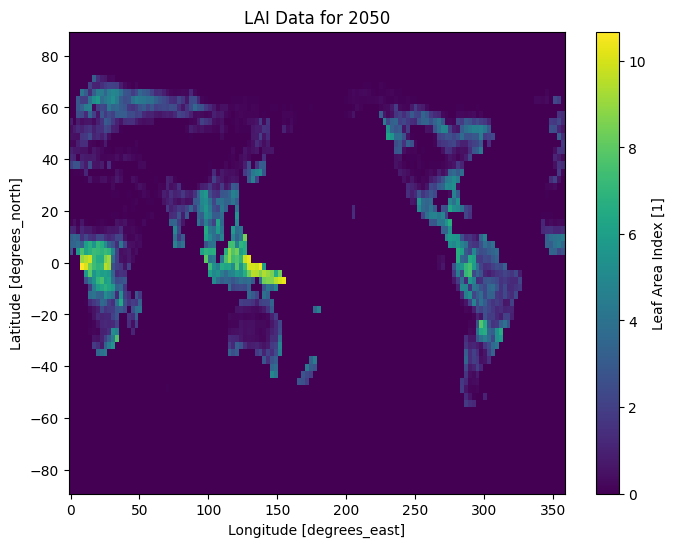

Processed data for 2050 saved to ssp_2050_lai_data.nc


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import os

def load_and_process_nc_file(file_path, year):
    # Check if the file exists before loading
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} was not found.")

    # Load the NetCDF file
    try:
        data = xr.open_dataset(file_path)
    except Exception as e:
        raise Exception(f"Error loading dataset: {e}")

    # Print basic information about the dataset
    print(f"Dataset loaded successfully from {file_path}")
    print(data)

    # Check the time variable and make sure the year is available
    if 'time' not in data:
        raise KeyError("'time' variable not found in the dataset.")

    print("Time variable info:")
    print(data['time'])

    # Extract the years from the time variable (assuming it can be converted to dates)
    time_values = xr.cftime_range(start=str(data['time'][0].values), periods=data.sizes['time'], freq='MS')

    # Check if the desired year is within the dataset
    if year < time_values.year.min() or year > time_values.year.max():
        raise ValueError(f"Year {year} is out of range. Available range: {time_values.year.min()} - {time_values.year.max()}")

    # Select data for the desired year
    year_start = f'{year}-01-01'
    year_end = f'{year}-12-31'
    data_year = data.sel(time=slice(year_start, year_end))

    # Ensure that the 'lai' variable exists
    if 'lai' not in data_year:
        raise KeyError("'lai' variable not found in the dataset.")

    # Visualize the LAI data for the first time step of the selected year
    plt.figure(figsize=(8, 6))
    data_year['lai'].isel(time=0).plot()
    plt.title(f'LAI Data for {year}')
    plt.show()

    # Optionally, save the selected data to a new NetCDF file
    output_file = f'ssp_{year}_lai_data.nc'
    data_year.to_netcdf(output_file)
    print(f"Processed data for {year} saved to {output_file}")

# Example usage:
file_path = file_path  # Replace with actual file path
year = 2050  # Year you want to extract
load_and_process_nc_file(file_path, year)



In [ ]:
# downloading data from API Using the Copernicus Climate Data Store
!pip install cdsapi


In [ ]:
cds = cdsapi.Client()

In [ ]:
import cdsapi

# Initialize the CDS API client
c = cdsapi.Client()

# Download the LAI data from Copernicus
c.retrieve(
    'satellite-land-cover',
    {
        'variable': 'leaf_area_index',
        'product_type': 'monthly_mean',
        'year': '2023',  # Set the desired year
        'month': '01',  # Set the desired month
        'format': 'netcdf'  # File format
    },
    'lai_data.nc')  # Save as 'lai_data.nc'


In [ ]:
# From google earth engine
!pip install earthengine-api


In [40]:
import ee
ee.Authenticate()
ee.Initialize(project='thakur-clm')

True

In [47]:
ee.Initialize(project='thakur-clm')

# Access the MODIS LAI dataset
lai_dataset = ee.ImageCollection('MODIS/006/MOD15A2H').select('Lai')

# Define the area of interest and the time range
aoi = ee.Geometry.Point([127, 35])  # Replace with coordinates
start_date = '2023-01-01'
end_date = '2023-12-31'

# Filter and download the LAI data
lai_filtered = lai_dataset.filterDate(start_date, end_date).filterBounds(aoi)

# Export as a GeoTIFF
task = ee.batch.Export.image.toDrive(**{
    'image': lai_filtered.mean(),
    'description': 'LAI_2023',
    'folder': 'EarthEngineData',
    'scale': 500,
    'region': aoi
})
task.start()


In [49]:
import ee
import geemap

# # Authenticate and initialize Earth Engine
# ee.Authenticate()
# ee.Initialize()

# Access the MODIS LAI dataset
lai_dataset = ee.ImageCollection('MODIS/006/MOD15A2H').select('Lai_500m')

# Define the area of interest and the time range
aoi = ee.Geometry.Point([127, 35])  # Replace with your coordinates
start_date = '2023-01-01'
end_date = '2023-12-31'

# Filter the dataset for the specific time range and region
lai_filtered = lai_dataset.filterDate(start_date, end_date).filterBounds(aoi)

# Get the mean LAI for the specified time range
lai_mean = lai_filtered.mean()

# Visualize the data using the geemap library
Map = geemap.Map()
Map.centerObject(aoi, 8)  # Zoom to the area of interest
Map.addLayer(lai_mean, {'min': 0, 'max': 8, 'palette': ['white', 'green']}, 'Mean LAI')
Map.add_colorbar(vis_params={'min': 0, 'max': 8, 'palette': ['white', 'green']}, label="LAI")

# Display the map in the notebook
Map  # Simply place the Map object at the end to display it


Map(center=[35, 127.00000000000001], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Se…

In [ ]:
# Extracting data for Nepal

In [ ]:
import ee
import geemap
import pandas as pd

# # Authenticate and initialize Earth Engine
# ee.Authenticate()
# ee.Initialize()

# Access the MODIS LAI dataset
lai_dataset = ee.ImageCollection('MODIS/006/MOD15A2H').select('Lai_500m')

# Define the area of interest (AOI) for Nepal
nepal_boundary = ee.FeatureCollection('users/giswqs/nepal')  # Use the built-in feature collection for Nepal # need to change boundary

# Define the time range
start_date = '2023-01-01'
end_date = '2023-12-31'

# Filter the dataset for the specified time range and region
lai_filtered = lai_dataset.filterDate(start_date, end_date).filterBounds(nepal_boundary)

# Calculate the mean LAI for each time step
def get_mean_lai(image):
    mean_lai = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=nepal_boundary.geometry(),
        scale=500,
        maxPixels=1e13
    )
    mean_lai = mean_lai.set('system:time_start', image.get('system:time_start'))
    return mean_lai

# Map over the filtered LAI dataset to get mean LAI values
mean_lai_time_series = lai_filtered.map(get_mean_lai)

# Convert the mean LAI to a list
mean_lai_list = mean_lai_time_series.getInfo()

# Extract time series data
dates = []
lai_values = []
for item in mean_lai_list['features']:
    dates.append(item['properties']['system:time_start'])
    lai_values.append(item['properties']['Lai_500m'])

# Create a DataFrame for easier manipulation
time_series_df = pd.DataFrame({
    'Date': pd.to_datetime(dates, unit='ms'),
    'LAI': lai_values
})

# Print the time series DataFrame
print(time_series_df)

# Optionally, export the DataFrame to a CSV file
time_series_df.to_csv('nepal_lai_time_series.csv', index=False)


        Date        LAI
0 2023-01-01   8.470100
1 2023-01-09   9.727488
2 2023-01-17   9.639301
3 2023-01-25  10.224652
4 2023-02-02  10.612650
5 2023-02-10  10.688137


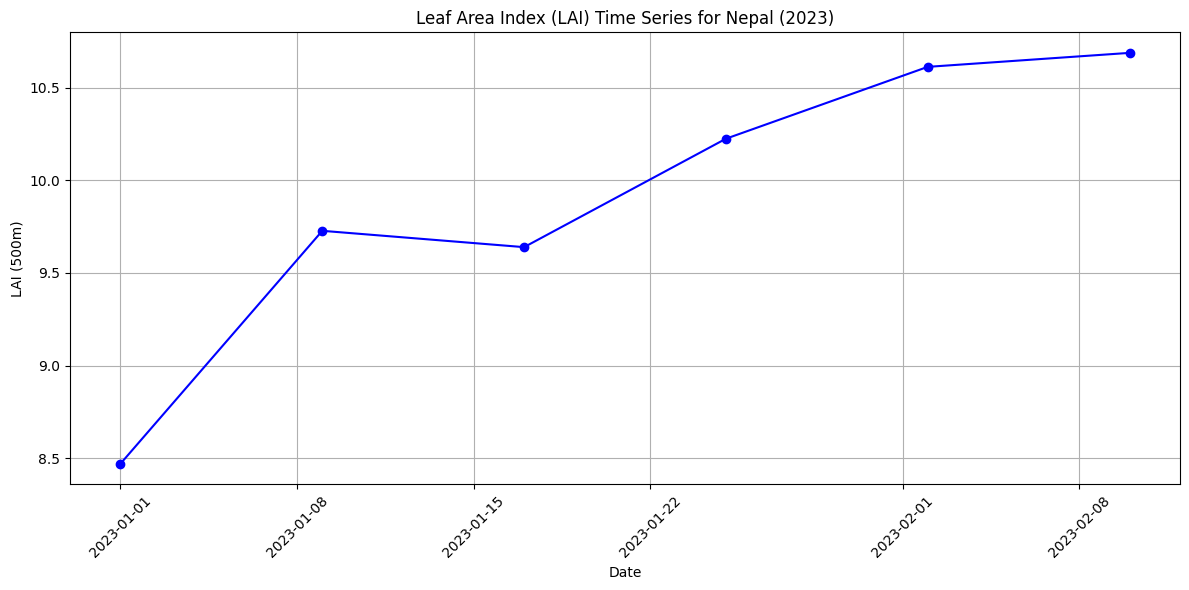

In [56]:
import ee
import geemap
import pandas as pd

# # Authenticate and initialize Earth Engine
# ee.Authenticate()
# ee.Initialize()

# Access the MODIS LAI dataset
lai_dataset = ee.ImageCollection('MODIS/006/MOD15A2H').select('Lai_500m')

# Define the area of interest (AOI) for Nepal using coordinates
nepal_boundary = ee.Geometry.Polygon([
    [
        [80.0583, 30.4475],  # Northwest
        [80.0583, 26.3476],  # Southwest
        [88.2014, 26.3476],  # Southeast
        [88.2014, 30.4475],  # Northeast
        [80.0583, 30.4475]   # Northwest (closing the polygon)
    ]
])

# Define the time range
start_date = '2023-01-01'
end_date = '2023-12-31'

# Filter the dataset for the specified time range and region
lai_filtered = lai_dataset.filterDate(start_date, end_date).filterBounds(nepal_boundary)

# Calculate the mean LAI for each time step
def get_mean_lai(image):
    mean_lai = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=nepal_boundary,
        scale=500,
        maxPixels=1e13
    )
    # Create a feature with mean LAI and time
    return ee.Feature(None, {
        'system:time_start': image.get('system:time_start'),
        'Lai_500m': mean_lai.get('Lai_500m')
    })

# Map over the filtered LAI dataset to get mean LAI values
mean_lai_time_series = lai_filtered.map(get_mean_lai)

# Convert the mean LAI to a list
mean_lai_list = mean_lai_time_series.getInfo()

# Extract time series data
dates = []
lai_values = []
for item in mean_lai_list['features']:
    dates.append(item['properties']['system:time_start'])
    lai_values.append(item['properties']['Lai_500m'])

# Create a DataFrame for easier manipulation
time_series_df = pd.DataFrame({
    'Date': pd.to_datetime(dates, unit='ms'),
    'LAI': lai_values
})

# Print the time series DataFrame
print(time_series_df)

# Optionally, export the DataFrame to a CSV file
time_series_df.to_csv('nepal_lai_time_series.csv', index=False)
# Plotting the time series data for Nepal
plt.figure(figsize=(12, 6))
plt.plot(time_series_df['Date'], time_series_df['LAI'], marker='o', linestyle='-', color='b')
plt.title('Leaf Area Index (LAI) Time Series for Nepal (2023)')
plt.xlabel('Date')
plt.ylabel('LAI (500m)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Using data from the first available date: 2023-01-01
Mean Leaf Area Index (LAI) for Nepal on 2023-01-01: 8.470099674245114


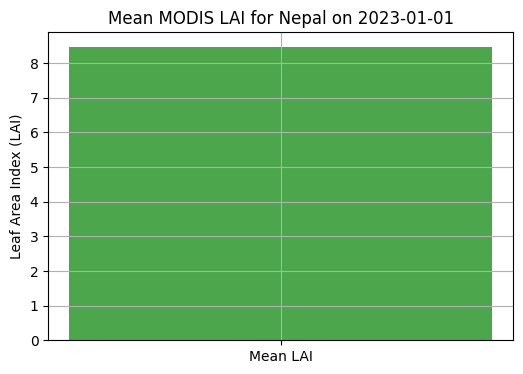

In [61]:
import ee
import geemap
import matplotlib.pyplot as plt
import numpy as np

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Access the MODIS LAI dataset
lai_dataset = ee.ImageCollection('MODIS/006/MOD15A2H').select('Lai_500m')

# Define the area of interest (AOI) for Nepal using coordinates
nepal_boundary = ee.Geometry.Polygon([
    [
        [80.0583, 30.4475],  # Northwest
        [80.0583, 26.3476],  # Southwest
        [88.2014, 26.3476],  # Southeast
        [88.2014, 30.4475],  # Northeast
        [80.0583, 30.4475]   # Northwest (closing the polygon)
    ]
])

# Define a range of dates to check for available data
date_range = ee.DateRange('2023-01-01', '2023-12-31')
available_dates = lai_dataset.filterDate(date_range).filterBounds(nepal_boundary)

# Get the number of images available in the collection
image_count = available_dates.size().getInfo()

if image_count == 0:
    print("No images available for the specified date range.")
else:
    # Get the list of available images
    available_images = available_dates.toList(image_count)

    # Get the first available image
    first_image = ee.Image(available_images.get(0))
    first_image_date = first_image.get('system:time_start').getInfo()
    first_image_date_str = ee.Date(first_image_date).format('YYYY-MM-dd').getInfo()

    print(f"Using data from the first available date: {first_image_date_str}")

    # Reduce the region to get average LAI value for Nepal
    lai_mean = first_image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=nepal_boundary,
        scale=500,
        maxPixels=1e13
    )

    # Get the mean LAI value
    lai_mean_value = lai_mean.getInfo()

    if 'Lai_500m' in lai_mean_value:
        # Extract the mean LAI value
        mean_lai = lai_mean_value['Lai_500m']
        print(f"Mean Leaf Area Index (LAI) for Nepal on {first_image_date_str}: {mean_lai}")

        # Plotting the mean LAI value
        plt.figure(figsize=(6, 4))
        plt.bar(['Mean LAI'], [mean_lai], color='green', alpha=0.7)
        plt.ylabel('Leaf Area Index (LAI)')
        plt.title(f'Mean MODIS LAI for Nepal on {first_image_date_str}')
        plt.grid(True)
        plt.show()
    else:
        print("No LAI data available for the specified date.")


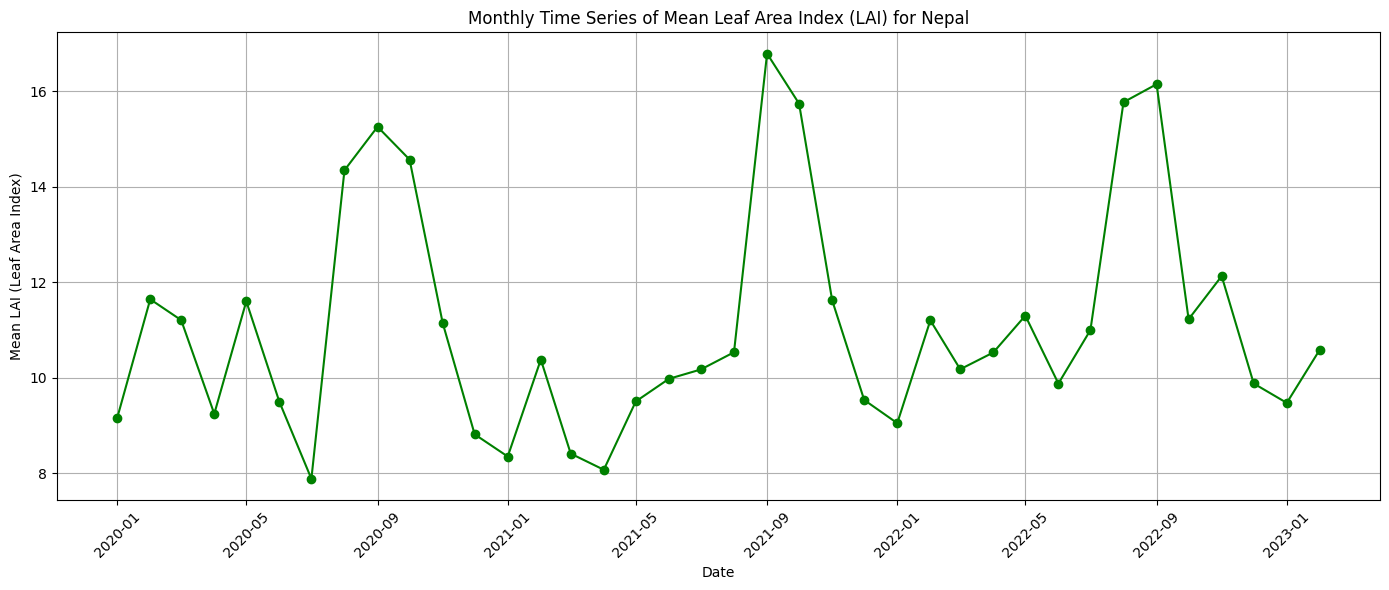

In [63]:
import ee
import geemap
import matplotlib.pyplot as plt
import pandas as pd

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Access the MODIS LAI dataset
lai_dataset = ee.ImageCollection('MODIS/006/MOD15A2H').select('Lai_500m')

# Define the area of interest (AOI) for Nepal using coordinates
nepal_boundary = ee.Geometry.Polygon([
    [
        [80.0583, 30.4475],  # Northwest
        [80.0583, 26.3476],  # Southwest
        [88.2014, 26.3476],  # Southeast
        [88.2014, 30.4475],  # Northeast
        [80.0583, 30.4475]   # Northwest (closing the polygon)
    ]
])

# Define the date range for the time series
start_date = '2020-01-01'  # Change as needed
end_date = '2023-12-31'    # Change as needed

# Create a time series of mean LAI values by month
def monthly_mean_lai(start, end):
    # Filter the dataset for the given month
    monthly_lai = lai_dataset.filterDate(start, end).mean().clip(nepal_boundary)

    # Reduce the region to get mean LAI value
    lai_mean = monthly_lai.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=nepal_boundary,
        scale=500,
        maxPixels=1e13
    )
    return lai_mean

# Create a list to store the results
date_list = ee.List.sequence(0, ee.Date(end_date).difference(ee.Date(start_date), 'month').getInfo())
results = []

for i in range(len(date_list.getInfo())):
    month_start = ee.Date(start_date).advance(i, 'month')
    month_end = month_start.advance(1, 'month')
    lai_mean = monthly_mean_lai(month_start, month_end)
    results.append(lai_mean)

# Get the mean LAI values and dates
lai_values = []
dates = []

for i in range(len(results)):
    lai_dict = results[i].getInfo()
    if 'Lai_500m' in lai_dict:
        lai_values.append(lai_dict['Lai_500m'])
        month_date = ee.Date(start_date).advance(i, 'month').format('YYYY-MM').getInfo()
        dates.append(month_date)

# Convert to a DataFrame for easier plotting
df = pd.DataFrame({'Date': pd.to_datetime(dates), 'Mean LAI': lai_values})

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Mean LAI'], marker='o', linestyle='-', color='green')
plt.title('Monthly Time Series of Mean Leaf Area Index (LAI) for Nepal')
plt.xlabel('Date')
plt.ylabel('Mean LAI (Leaf Area Index)')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
Map

Map(center=[35, 127.00000000000001], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Se…